In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Reference the file where the CSV is located
path = Path("../Resources/medianSalesPrice_All.csv")

# Import the data into a Pandas DataFrame
sales_data_df = pd.read_csv(path, encoding="UTF-8")
sales_data_df.head()

,areaName,Borough,areaType,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
0,All Downtown,Manhattan,submarket,1317500.0,1579500.0,1420000.0,1337500.0,1375000.0,1337500.0,1504668.0,...,1500000.0,1345208.5,1414699.0,1550000.0,1529500.0,1400000.0,1412766.0,1230266.0,1372500.0,1575000.0
1,All Midtown,Manhattan,submarket,853000.0,942000.0,960000.0,865000.0,856038.5,850000.0,870000.0,...,900000.0,900000.0,950000.0,935000.0,882938.5,830000.0,872500.0,828750.0,830000.0,1197500.0
2,All Upper East Side,Manhattan,submarket,1175000.0,1022000.0,1260000.0,1215000.0,1171639.0,1100000.0,1160805.0,...,1150000.0,1265000.0,1255000.0,1075000.0,1100000.0,1200000.0,1150000.0,1282500.0,1220000.0,1210000.0
3,All Upper Manhattan,Manhattan,submarket,625000.0,547500.0,582500.0,646250.0,580000.0,704213.5,645000.0,...,645000.0,465000.0,667500.0,534790.5,625000.0,605900.0,575000.0,622250.0,539750.0,547500.0
4,All Upper West Side,Manhattan,submarket,973468.5,1250000.0,1250000.0,1480000.0,1348888.0,985000.0,1205000.0,...,1050000.0,1100000.0,1222500.0,1405000.0,1147500.0,1135000.0,1092500.0,1135265.5,1200000.0,1050000.0


In [3]:
# Use the melt function to unpivot the DataFrame and create a single column for dates
sales_data_df = sales_data_df.melt(id_vars=['areaName', 'Borough', 'areaType'], var_name='Date', value_name='Price')

# Convert Date column to datetime type
sales_data_df['Date'] = pd.to_datetime(sales_data_df['Date'])

# Display the cleaned and rearranged DataFrame
sales_data_df.head()


,areaName,Borough,areaType,Date,Price
0,All Downtown,Manhattan,submarket,2018-01-01,1317500.0
1,All Midtown,Manhattan,submarket,2018-01-01,853000.0
2,All Upper East Side,Manhattan,submarket,2018-01-01,1175000.0
3,All Upper Manhattan,Manhattan,submarket,2018-01-01,625000.0
4,All Upper West Side,Manhattan,submarket,2018-01-01,973468.5


In [4]:
# Drop null rows
clean_sales_df = sales_data_df.dropna(how='any')
clean_sales_df.head()

,areaName,Borough,areaType,Date,Price
0,All Downtown,Manhattan,submarket,2018-01-01,1317500.0
1,All Midtown,Manhattan,submarket,2018-01-01,853000.0
2,All Upper East Side,Manhattan,submarket,2018-01-01,1175000.0
3,All Upper Manhattan,Manhattan,submarket,2018-01-01,625000.0
4,All Upper West Side,Manhattan,submarket,2018-01-01,973468.5


In [5]:
# Filter for submarket data only
sales_sub_df = clean_sales_df[(clean_sales_df.areaType == 'submarket')]
sales_sub_df.head()

,areaName,Borough,areaType,Date,Price
0,All Downtown,Manhattan,submarket,2018-01-01,1317500.0
1,All Midtown,Manhattan,submarket,2018-01-01,853000.0
2,All Upper East Side,Manhattan,submarket,2018-01-01,1175000.0
3,All Upper Manhattan,Manhattan,submarket,2018-01-01,625000.0
4,All Upper West Side,Manhattan,submarket,2018-01-01,973468.5


# Median Sales Price Trend Over the Years

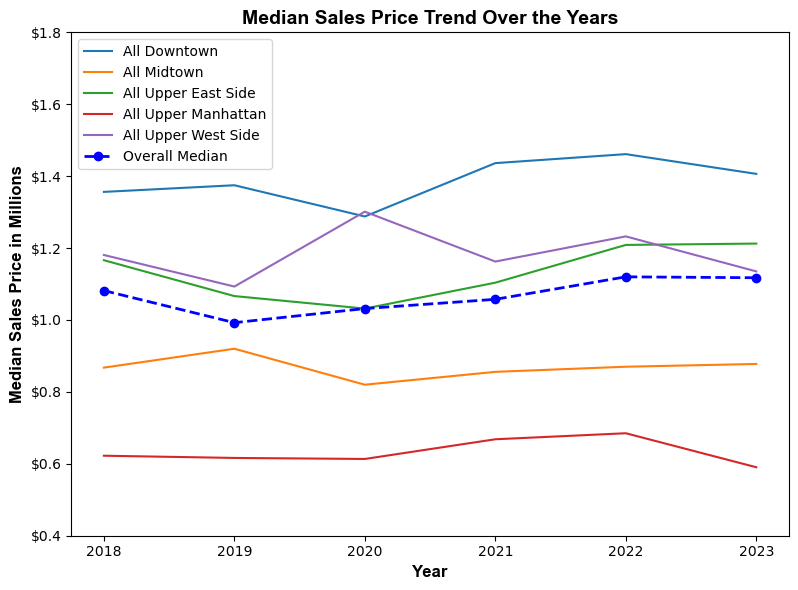

In [7]:
# Extract year from 'Date' column
#sales_sub_df['Year'] = sales_sub_df['Date'].dt.year

# Calculate the median price for each areaName
median_prices_area = sales_sub_df.groupby(['Year','areaName'])['Price'].median().unstack() / 1E6

# Calculate the overall median price
overall_median = sales_sub_df.groupby('Year')['Price'].median() / 1E6

# Define the formatting function
def dollar_formatter(x, pos):
    return f'${x:.1f}'

# Create the formatter
formatter = FuncFormatter(dollar_formatter)

# Plotting
plt.figure(figsize=(8, 6))
tfont = {'fontname': 'Arial', 'fontsize': 14, 'fontweight': 'bold'}
axisfont = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

# Plot median prices for each areaName
for area in median_prices_area.columns:
    plt.plot(median_prices_area.index, median_prices_area[area], label=area)

# Plot overall median as a dashed line
plt.plot(overall_median.index, overall_median, linestyle='--', marker='o', markerfacecolor='blue', label='Overall Median', color='blue', linewidth=2.0)

plt.title('Median Sales Price Trend Over the Years', **tfont)
plt.xlabel('Year', **axisfont)
plt.ylabel('Median Sales Price in Millions', **axisfont)
plt.ylim(0.4, 1.8)
plt.legend()
plt.tight_layout()
plt.xticks([2018, 2019, 2020, 2021, 2022, 2023])
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## Analysis

#### The median sales prices across downtown, midtown, upper east side, upper Manhattan, and upper west side exhibited diverse trajectories over the analyzed period. Before the onset of the COVID-19 pandemic in March 2020, prices fluctuated between 0.6 to 1.4 million dollars. However, during the pandemic, a distinct pattern emerged: while the upper west side saw an uptick in median prices, the other areas experienced declines. This discrepancy suggests unique market dynamics in the upper west side compared to the rest of the analyzed regions.

#### From 2021 onward, there was a general trend of increasing median prices across all areas, indicating a broader market recovery post-pandemic. Notably, the upper west side's price growth appeared to plateau compared to other regions, suggesting a potential divergence in market trends. These findings underscore the nuanced and evolving nature of real estate dynamics, influenced by factors such as location desirability, economic conditions, and pandemic-related shifts in demand.

# Median Sales Price by Neighborhood Pre-covid, during Covid and Post-Covid

In [8]:
# Filter for Neighborhoods data only
sales_n_df = clean_sales_df[(clean_sales_df.areaType == 'neighborhood')]
sales_df = sales_n_df[sales_n_df['Date'] <= '2022-12-01']
sales_df.head()

,areaName,Borough,areaType,Date,Price
5,Battery Park City,Manhattan,neighborhood,2018-01-01,1085000.0
6,Central Harlem,Manhattan,neighborhood,2018-01-01,699000.0
8,Chelsea,Manhattan,neighborhood,2018-01-01,965000.0
12,East Village,Manhattan,neighborhood,2018-01-01,1110037.5
13,Financial District,Manhattan,neighborhood,2018-01-01,1205904.0


In [9]:
# Filter out neighborhoods with less than 36 data points
sales_df_filtered = sales_df.groupby('areaName').filter(lambda x: len(x) >= 36)

# Filter the DataFrame for dates before March 2020
precovid_df = sales_df_filtered[sales_df_filtered['Date'] < '2020-03-01']

# Calculate the mean price for each neighborhood
precovid_mean_price_neighborhood = precovid_df.groupby('areaName')['Price'].median().sort_values() / 1E6
precovid_df

,areaName,Borough,areaType,Date,Price
5,Battery Park City,Manhattan,neighborhood,2018-01-01,1085000.0
6,Central Harlem,Manhattan,neighborhood,2018-01-01,699000.0
8,Chelsea,Manhattan,neighborhood,2018-01-01,965000.0
12,East Village,Manhattan,neighborhood,2018-01-01,1110037.5
13,Financial District,Manhattan,neighborhood,2018-01-01,1205904.0
...,...,...,...,...,...
982,Tribeca,Manhattan,neighborhood,2020-02-01,3228699.0
983,Upper East Side,Manhattan,neighborhood,2020-02-01,1013500.0
984,Upper West Side,Manhattan,neighborhood,2020-02-01,1497500.0
985,Washington Heights,Manhattan,neighborhood,2020-02-01,550269.0


In [10]:
# Filter the DataFrame for dates during covid March 2020 to December 2020
covid_df = sales_df_filtered[(sales_df_filtered['Date'] > '2020-03-01') & (sales_df_filtered['Date'] <= '2020-12-01')]

# Calculate the mean price for each neighborhood
covid_mean_price_neighborhood = covid_df.groupby('areaName')['Price'].median().sort_values() / 1E6
covid_df

,areaName,Borough,areaType,Date,Price
1032,Central Harlem,Manhattan,neighborhood,2020-04-01,750000.0
1034,Chelsea,Manhattan,neighborhood,2020-04-01,1492500.0
1039,Financial District,Manhattan,neighborhood,2020-04-01,687500.0
1041,Gramercy Park,Manhattan,neighborhood,2020-04-01,999000.0
1042,Greenwich Village,Manhattan,neighborhood,2020-04-01,1252643.0
...,...,...,...,...,...
1362,Tribeca,Manhattan,neighborhood,2020-12-01,3862750.0
1363,Upper East Side,Manhattan,neighborhood,2020-12-01,1075000.0
1364,Upper West Side,Manhattan,neighborhood,2020-12-01,1175000.0
1365,Washington Heights,Manhattan,neighborhood,2020-12-01,617500.0


In [11]:
# Filter the DataFrame for dates after December 2020
postcovid_df = sales_df_filtered[sales_df_filtered['Date'] > '2020-12-01']

# Calculate the mean price for each neighborhood
postcovid_mean_price_neighborhood = postcovid_df.groupby('areaName')['Price'].median().sort_values() / 1E6
postcovid_df

,areaName,Borough,areaType,Date,Price
1373,Battery Park City,Manhattan,neighborhood,2021-01-01,775000.0
1374,Central Harlem,Manhattan,neighborhood,2021-01-01,968750.0
1376,Chelsea,Manhattan,neighborhood,2021-01-01,1245000.0
1380,East Village,Manhattan,neighborhood,2021-01-01,1357250.0
1381,Financial District,Manhattan,neighborhood,2021-01-01,1300000.0
...,...,...,...,...,...
2274,Tribeca,Manhattan,neighborhood,2022-12-01,3875000.0
2275,Upper East Side,Manhattan,neighborhood,2022-12-01,1225000.0
2276,Upper West Side,Manhattan,neighborhood,2022-12-01,998420.0
2277,Washington Heights,Manhattan,neighborhood,2022-12-01,42500.0


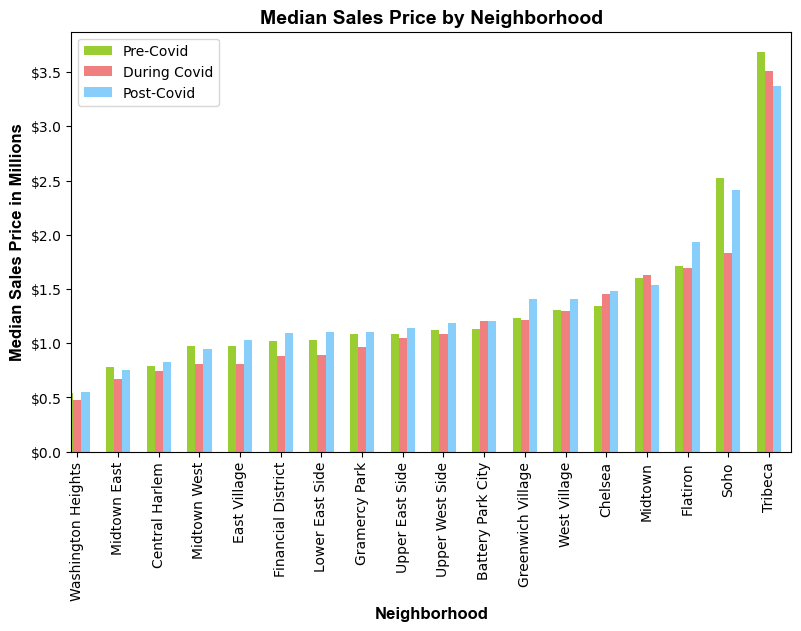

In [12]:
# Plotting
plt.figure(figsize=(12, 6))
tfont = {'fontname': 'Arial', 'fontsize': 14, 'fontweight': 'bold'}
axisfont = {'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}

# Plotting precovid data
precovid_mean_price_neighborhood.plot(kind='bar', color='yellowgreen', position=1.5, width=0.2, label='Pre-Covid')

# Plotting covid data
covid_mean_price_neighborhood.plot(kind='bar', color='lightcoral', position=0.5, width=0.2, label='During Covid')

# Plotting postcovid data
postcovid_mean_price_neighborhood.plot(kind='bar', color='lightskyblue', position=-0.5, width=0.2, label='Post-Covid')

plt.title('Median Sales Price by Neighborhood', **tfont)
plt.xlabel('Neighborhood', **axisfont)
plt.ylabel('Median Sales Price in Millions', **axisfont)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.2)  # Adjust margins
plt.show()

## Analisis

#### The analysis of Manhattan neighborhoods' median sales prices before, during, and after COVID reveals a multifaceted trend. Generally, there was a drop in prices during the pandemic period, followed by an increase post-COVID. Notably, most neighborhoods saw a significant rise in prices of around 5 to 10% when comparing pre- and post-COVID periods. However, exceptions like Tribeca and Soho showed a continued decrease in values after the pandemic, suggesting a complex interplay of factors influencing real estate dynamics within specific neighborhoods, potentially tied to unique market dynamics and demand shifts.